Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [175]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\vjera\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [176]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [177]:
from sklearn.preprocessing import PolynomialFeatures
func = PolynomialFeatures(1)
Theta = func.fit_transform(X)
print(Theta)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [178]:
from numpy import linalg, matmul
Theta_transpose = Theta.transpose()
inverse = linalg.inv(matmul(Theta_transpose, Theta))
W = matmul(matmul(inverse, Theta_transpose), y)
print(W)
W_1 = matmul(linalg.pinv(Theta), y)
print(W_1)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

[array([2.2]), array([2.65714286]), array([3.11428571]), array([4.02857143])]
[4 1 2 5]
2.042857142857143


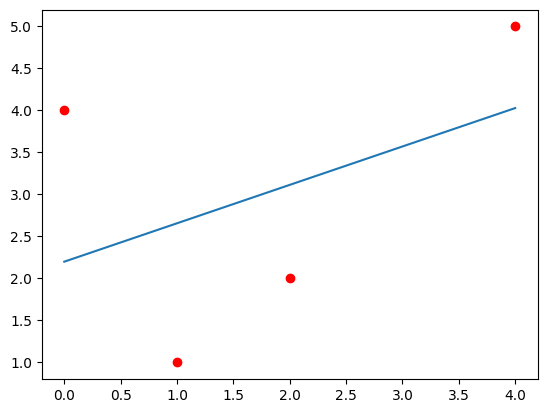

In [184]:
from sklearn.metrics import mean_squared_error
h = []
for i in range(0, 4):
    h.append(W[0] + W[1] * X[i])
print(h)
print(y)
E = mean_squared_error(h, y)
print(E)

plt.scatter(X, y, color = "red")
plt.plot(X, h)


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [10]:
#W_2 = matmul(linalg.inv(Theta), y)
#preslikavanje u dimenziju 3 kako bismo dobili kvadratu matricu punog ranga -> kako bi postojao inverz te matrice
theta_3 = PolynomialFeatures(3).fit_transform(X)
print(theta_3)
W_2_5 = matmul(linalg.inv(theta_3), y)
print(W_2_5)
#.....

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[ 4.         -5.91666667  3.375      -0.45833333]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
W_lib = LinearRegression(fit_intercept=False).fit(Theta, y)
print(W_lib.coef_)


predictions = []
for i in range(0, X.size):
    predictions.append(W_lib.predict(np.array([Theta[i]])))

err = mean_squared_error(predictions, y)
print(err)


[2.2        0.45714286]
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [14]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    y = []
    N = len(X)
    for i in range(0, N):
        y.append(f(X[i]) + normal(0, noise))

    return y

def f(x):
    return 5 + x - 2*x*x - 5*x*x*x 


In [15]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [40]:
X_2 = make_instances(-5, 5, 50)
Y_2 = make_labels(X_2, f, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

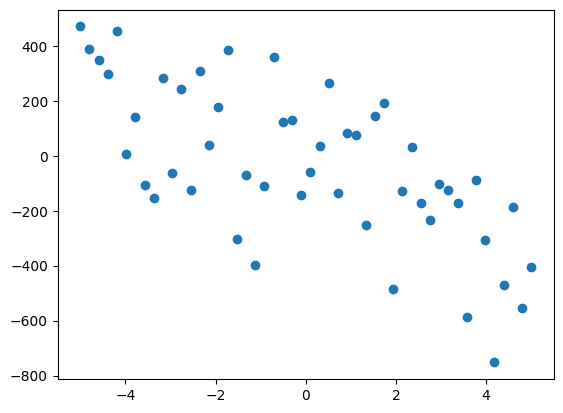

In [17]:
plt.scatter(X_2, Y_2)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

38816.43917153564


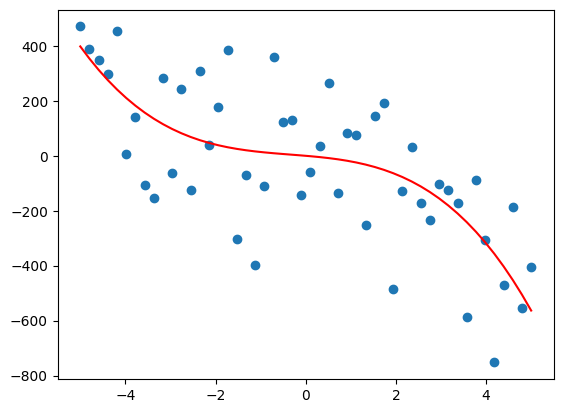

In [20]:
theta_2_b = PolynomialFeatures(3).fit_transform(X_2)

W_2_b = LinearRegression(fit_intercept=False).fit(theta_2_b, Y_2)
#W_2_bb = matmul(matmul(linalg.inv(matmul(theta_2_b.transpose(), theta_2_b)), theta_2_b.transpose()), Y_2)

#print(W_2_b.intercept_)
#print(W_2_b.coef_)
#print(W_2_bb)

#W_real = W_2_b.coef_
#W_real[0][0] = W_2_b.intercept_

#print(theta_2_b)
#print(W_real)

h = matmul(theta_2_b, W_2_b.coef_.transpose())
#print(h)

predictions = []
predictions = W_2_b.predict(theta_2_b)

#print(predictions)
#print(Y_2)

err = mean_squared_error(predictions, Y_2)
print(err)

plt.plot(X_2, predictions, 'r-')
plt.scatter(X_2, Y_2)


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

1. model has error: 39029.63540498807
2. model has error: 33130.70428547119
3. model has error: 32561.016239903474
4. model has error: 29777.52702960813
5. model has error: 27624.55556452073


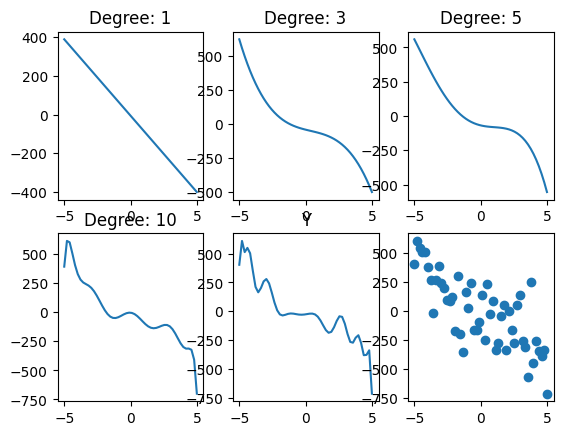

In [190]:
d = [1, 3, 5, 10, 20]
err = []

counter = 1

for d_ in d:
    theta_3 = PolynomialFeatures(d_).fit_transform(X_2)
    w_ = LinearRegression(fit_intercept=False).fit(theta_3, Y_2)

    predictions = w_.predict(theta_3)

    err_ = mean_squared_error(predictions, Y_2)
    err.append(err_)

    plt.subplot(2,3, counter)
    plt.title(f"Degree: {d_}")
    plt.plot(X_2, predictions)
    counter += 1

plt.title(f"Y")
plt.subplot(2,3, counter)
plt.scatter(X_2, Y_2)

counter = 0
for err_ in err:
    print(str(counter + 1) + ". model has error: " + str(err[counter]))
    counter += 1
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

min error value is 41500.90235959327 for model: 4


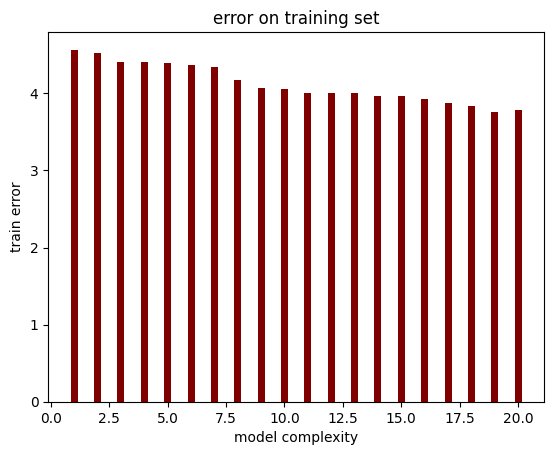

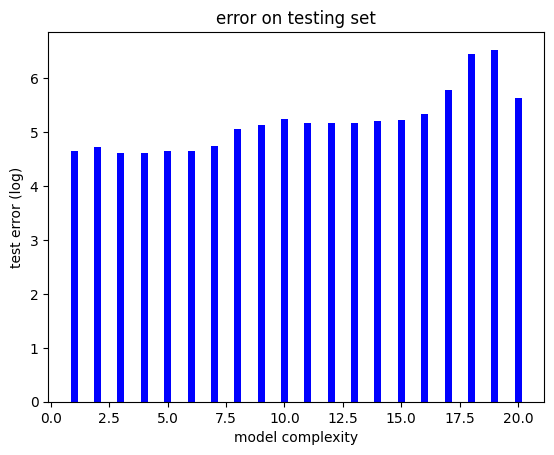

In [193]:
from sklearn.model_selection import train_test_split
import math
x_train, x_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.5, random_state=30)

e_train = []
e_test = []

e_test_log = []
e_train_log = []

low_bound = 1
up_bound = 21

d = []
for i in range(low_bound, up_bound):
    d.append(i)

for i in range(low_bound, up_bound):
    theta = PolynomialFeatures(i).fit_transform(x_train)
    w = LinearRegression(fit_intercept=False).fit(theta, y_train)

    predictions_train = w.predict(theta)

    e_train.append(mean_squared_error(predictions_train, y_train))

    theta_test  = PolynomialFeatures(i).fit_transform(x_test)
    predictions_test = w.predict(theta_test)

    e_test.append(mean_squared_error(predictions_test, y_test))
    
min = e_test[0]
min_d = 1
counter = 1
for e_ in e_test:
    e_test_log.append(math.log10(e_))
    if e_ < min:
        min = e_
        min_d = counter
    counter += 1

for e_ in e_train:
    e_train_log.append(math.log10(e_))

print("min error value is " + str(min) + " for model: " + str(min_d))
plt.bar(d, e_train_log, color ='maroon', 
        width = 0.3)
 
plt.xlabel("model complexity")
plt.ylabel("train error")
plt.title("error on training set")
plt.show()

plt.bar(d, e_test_log, color ='blue', 
        width = 0.3)
 
plt.xlabel("model complexity")
plt.ylabel("test error (log)")
plt.title("error on testing set")
plt.show()
    


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

In [135]:
N_ratio = [0.33, 0.66, 1]
sigma = [100, 200, 500]

N = 1000

Y = []
X = make_instances(-5, 5, N)

X_train = []
X_test = []
Y_train = []
Y_test = []

e_train = []
e_test = []

d = [0, 21]

#create Xs
X_train = X[0:500]
X_test = X[500:1000]

#create Ys
for s in sigma:
    Y_train.append(make_labels(X_train, f, s))
    Y_test.append(make_labels(X_test, f, s))

e_train_d = []
e_test_d = []
for i in range(low_bound, up_bound):
    theta = PolynomialFeatures(i).fit_transform(X_train)
    for j in range(0, 3):
        e_train_d = []
        e_test_d = []
        w = LinearRegression(fit_intercept=False).fit(theta, Y_train[j])

        predictions_train = w.predict(theta)

        e_train_d.append(mean_squared_error(predictions_train, Y_train[j]))

        theta_test  = PolynomialFeatures(i).fit_transform(X_test[j%3])
        predictions_test = w.predict(theta_test)

        e_test_d.append(mean_squared_error(predictions_test, Y_test[j]))
e_train.append(e_train_d)
e_test.append(e_test_d)


print(e_test)

fig, axs = plt.subplots(9)
fig.suptitle('title')

for i in range(0, len(N_ratio)):
    for j in range(0, len(sigma)):
        axs[i*j].plot(d, e_train[i*j])
        axs[i*j].plot(d, e_test[i*j])








ValueError: Expected 2D array, got 1D array instead:
array=[0.00500501].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [216]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

lamda = [0, 1, 10]

Theta = PolynomialFeatures(3).fit_transform(X)

I = np.diag(np.full(4,1)) 
I[0][0] = 0


W = []

for i in range(0, 3):   
    W.append(matmul(matmul(linalg.inv(matmul(Theta.transpose(), Theta) + lamda[i]*I), Theta.transpose()), y))

for i in range(0, 3):
    print(W[i])


[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [69]:
from sklearn.linear_model import Ridge
n_samples, n_features = 4, 1

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

lamda = [0, 1, 10]

Theta = PolynomialFeatures(3).fit_transform(X)

for i in lamda:
    clf = Ridge(alpha=i, fit_intercept=False)
    clf.fit(Theta, y)
    #Ridge()
    print(clf.coef_)
    



[ 4.         -5.91666667  3.375      -0.45833333]
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]
[0.43312265 0.11060671 0.13827839 0.03093411]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

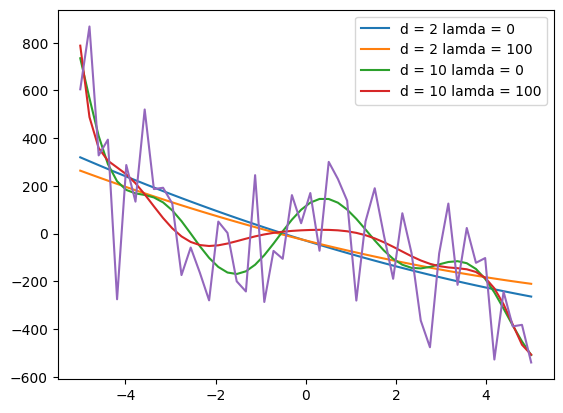

In [131]:
lamda = [0, 100]
d = [2, 10]

X = make_instances(-5, 5, 50)

Y = (make_labels(X, f, 200))

I = []
Theta = []

for k in d:
    I.append(np.diag(np.full(k+1, 1)))
    Theta.append(PolynomialFeatures(k).fit_transform(X))

I[0][0][0] = 0
I[1][0][0] = 0

for i in range(0, 2):
    for j in range(0, 2):
        w__ = matmul(matmul(linalg.inv(matmul(Theta[i].transpose(), Theta[i]) + lamda[j]*I[i]), Theta[i].transpose()), Y)
        predictions = matmul(w__.transpose(), Theta[i].transpose())
        plt.plot(X, predictions.transpose(), label="d = " + str(d[i]) + " lamda = " + str(lamda[j]))
plt.plot(X, Y)
plt.legend()
plt.show()




### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


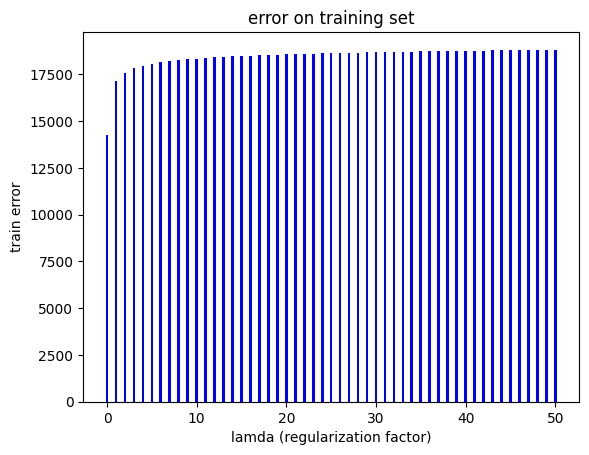

<BarContainer object of 51 artists>

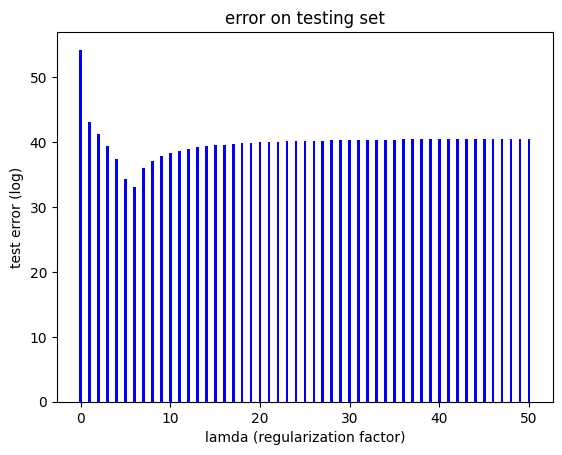

In [201]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from numpy.random import normal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from numpy import linalg, matmul
import math

def make_labels(X, f, noise=0):
    y = []
    N = len(X)
    for i in range(0, N):
        y.append(f(X[i]) + normal(0, noise))

    return y

def f(x):
    return 5 + x - 2*x*x - 5*x*x*x 

def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

d = 10
lamda = np.arange(0, 51)

X = make_instances(-5, 5, 50)
Y = make_labels(X, f, 200)

x_train = X[0:25]
x_test = X[25:50]

y_train = Y[0:25]
y_test = Y[25:50]

e_train = []
e_test = []

I = np.diag(np.full(d + 1, 1))
I[0][0] = 0

Theta_train = (PolynomialFeatures(d).fit_transform(x_train))
Theta_test = (PolynomialFeatures(d).fit_transform(x_test))

for i in lamda:
    w__ = matmul(matmul(linalg.inv(matmul(Theta_train.transpose(), Theta_train) + i * I), Theta_train.transpose()), y_train)
    predictions_train = matmul(Theta_train, w__)
    e_train.append(mean_squared_error(predictions_train, y_train))

    predictions_test = matmul(Theta_test, w__)
    e_test.append(mean_squared_error(predictions_test, y_test))

plt.xlabel("lamda (regularization factor)")
plt.ylabel("train error")
plt.title("error on training set")

plt.bar(lamda, e_train, color ='blue', 
        width = 0.3)

plt.show()
 
plt.xlabel("lamda (regularization factor)")
plt.ylabel("test error (log)")
plt.title("error on testing set")

for i in range(0, len(e_test)):
    e_test[i] = math.log(int(e_test[i]), 2)
    
plt.bar(lamda, e_test, color ='blue', 
        width = 0.3)







### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [161]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

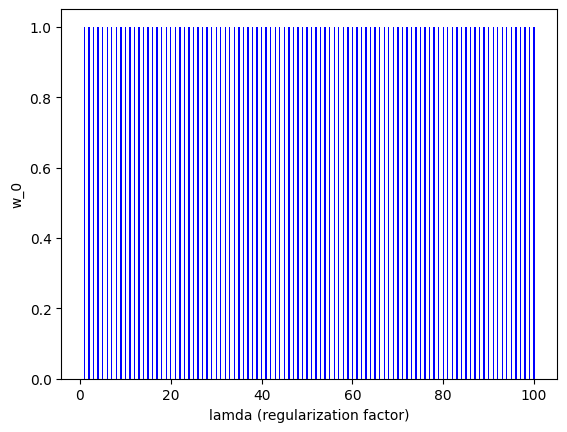

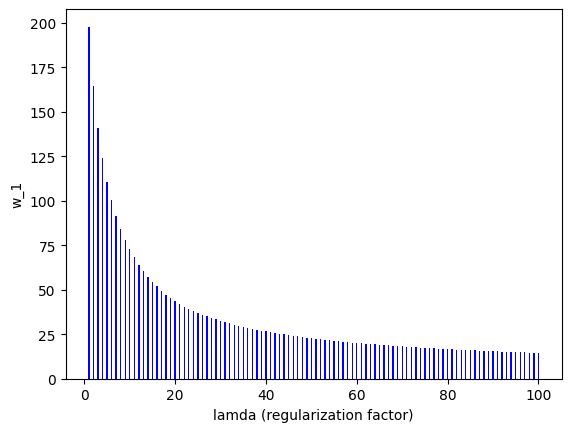

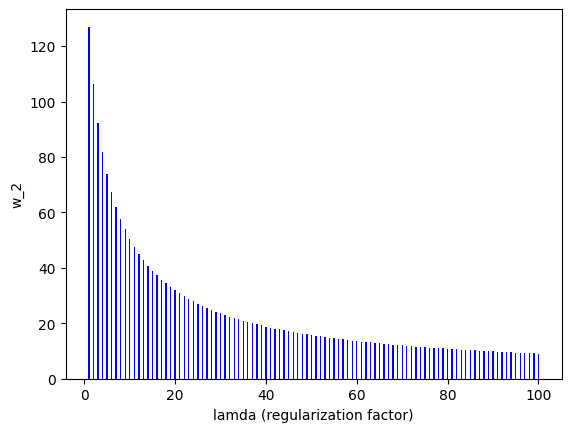

In [219]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import math
from numpy.linalg import norm

X_2 = make_instances(-5, 5, 50)
Y_2 = make_labels(X_2, f, 200)

x_train, x_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.5, random_state=30)


d = 5

lamda = np.arange(1, 101)

W = []
W_0 = []
W_1 = []
W_2 = []

for i in lamda:
    theta = PolynomialFeatures(d).fit_transform(x_train)
    ridge = Ridge(i, fit_intercept=False)
    ridge.fit(theta, y_train)

    w_0 = nonzeroes(ridge.coef_)

    w_1 = abs(ridge.coef_).sum()
    w_2 = norm(ridge.coef_)

    W_0.append(w_0)
    W_1.append(w_1)
    W_2.append(w_2)

plt.xlabel("lamda (regularization factor)")
plt.ylabel("w_0")

plt.bar(lamda, W_0, color ='blue', 
            width = 0.3)

plt.show()

plt.xlabel("lamda (regularization factor)")
plt.ylabel("w_1")

plt.bar(lamda, W_1, color ='blue', 
            width = 0.3)

plt.show()

plt.xlabel("lamda (regularization factor)")
plt.ylabel("w_2")

plt.bar(lamda, W_2, color ='blue', 
            width = 0.3)

plt.show()



### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

c:\Users\vjera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.325e+05, tolerance: 3.478e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\vjera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.850e+04, tolerance: 3.478e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\vjera\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

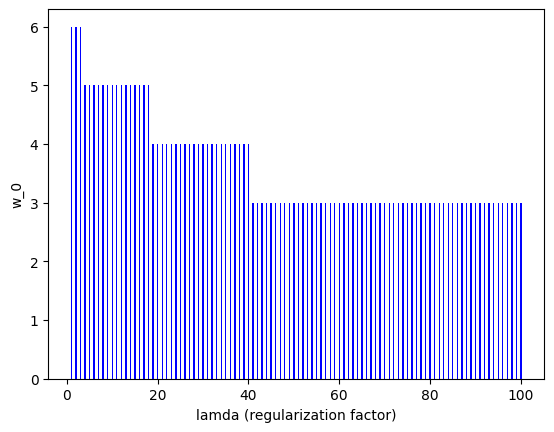

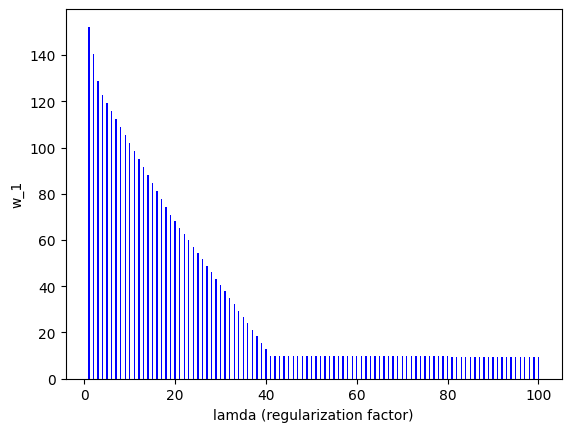

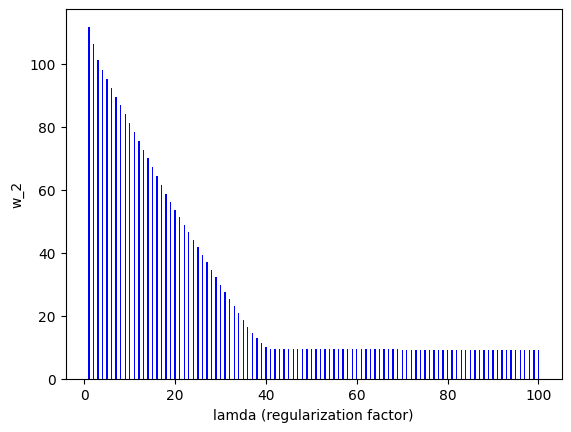

In [220]:
from sklearn.linear_model import Lasso
X_2 = make_instances(-5, 5, 50)
Y_2 = make_labels(X_2, f, 200)

x_train, x_test, y_train, y_test = train_test_split(X_2, Y_2, test_size=0.5, random_state=30)


d = 5

lamda = np.arange(1, 101)

W = []
W_0 = []
W_1 = []
W_2 = []

for i in lamda:
    theta = PolynomialFeatures(d).fit_transform(x_train)
    lassp = Lasso(i, fit_intercept=False)
    lassp.fit(theta, y_train)

    w_0 = nonzeroes(lassp.coef_)

    w_1 = abs(lassp.coef_).sum()
    w_2 = norm(lassp.coef_)

    W_0.append(w_0)
    W_1.append(w_1)
    W_2.append(w_2)

plt.xlabel("lamda (regularization factor)")
plt.ylabel("w_0")

plt.bar(lamda, W_0, color ='blue', 
            width = 0.3)

plt.show()

plt.xlabel("lamda (regularization factor)")
plt.ylabel("w_1")

plt.bar(lamda, W_1, color ='blue', 
            width = 0.3)

plt.show()

plt.xlabel("lamda (regularization factor)")
plt.ylabel("w_2")

plt.bar(lamda, W_2, color ='blue', 
            width = 0.3)

plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [222]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

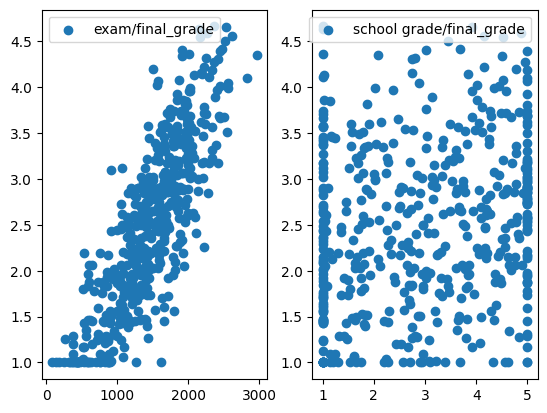

In [227]:
x_0 = []
x_1 = []
for exam, grade in grades_X:
    x_0.append(exam)
    x_1.append(grade)

plt.subplot(1,2,1)
plt.scatter(x_0, grades_y, label="exam/final_grade")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x_1, grades_y, label="school grade/final_grade")

plt.legend()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[0.1505747  0.00141498 0.09477666]


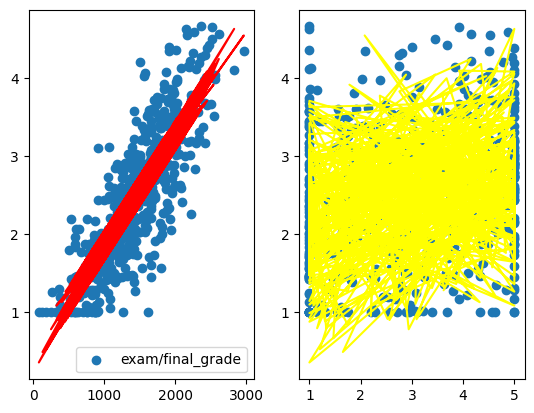

In [256]:
lamda = 0.01
theta = PolynomialFeatures(1).fit_transform(grades_X)
ridge = Ridge(lamda, fit_intercept=False)
ridge.fit(theta, grades_y)

h = ridge.predict(theta)

print(ridge.coef_)
ridge_coef_6_b = ridge.coef_

plt.subplot(1,2,1)
plt.scatter(x_0, grades_y, label="exam/final_grade")
plt.plot(x_0, h, color="red")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x_1, grades_y, label="school grade/final_grade")
plt.plot(x_1, h, color="yellow")


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

[[8.86970955e-17 8.16303750e-01 1.51677612e-01]]


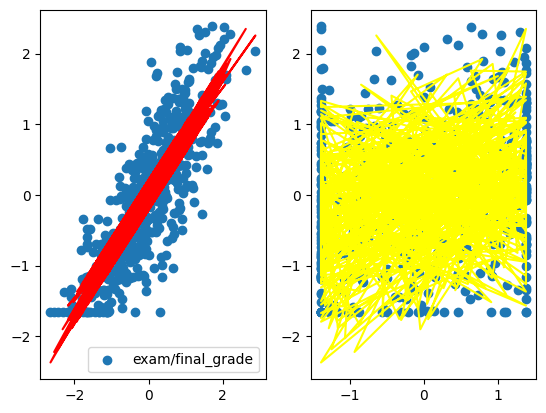

In [261]:
from sklearn.preprocessing import StandardScaler

lamda = 0.01

grades_X_fixed = StandardScaler().fit_transform(grades_X)

grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1, 1))

x_0_scaled = []
x_1_scaled = []
for exam, grade in grades_X_fixed:
    x_0_scaled.append(exam)
    x_1_scaled.append(grade)


theta_fixed = PolynomialFeatures(1).fit_transform(grades_X_fixed)
ridge = Ridge(lamda, fit_intercept=False)
ridge.fit(theta_fixed, grades_y_fixed)

h = ridge.predict(theta_fixed)
ridge_coef_6_b_2 = ridge.coef_

print(ridge.coef_)

plt.subplot(1,2,1)
plt.scatter(x_0_scaled, grades_y_fixed, label="exam/final_grade")
plt.plot(x_0_scaled, h, color="red")
plt.legend()
plt.subplot(1,2,2)
plt.scatter(x_1_scaled, grades_y_fixed, label="school grade/final_grade")
plt.plot(x_1_scaled, h, color="yellow")

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [246]:
grades_X_fixed_colinear = grades_X_fixed

last_column = grades_X_fixed[:, -1]

# Stack the last column to the right of the matrix
grades_X_fixed_colinear = np.hstack((grades_X_fixed, last_column.reshape(-1, 1)))

print(grades_X_fixed)
print(grades_X_fixed_colinear)

[[ 9.50638167e-01 -7.86078688e-01]
 [-5.03434341e-01 -5.01930040e-01]
 [ 1.18596832e+00 -5.22131716e-01]
 [-5.01521087e-01  1.00664465e+00]
 [-1.45432123e+00  1.07657545e+00]
 [ 4.55105562e-01  1.37463962e+00]
 [ 1.22805990e+00  3.17053750e-02]
 [ 1.08456590e+00  1.37463962e+00]
 [ 8.89414061e-01  1.10502124e+00]
 [ 7.34440544e-01 -1.64077221e-01]
 [-1.39916214e-01 -1.38407669e+00]
 [-4.24990955e-01  5.53692134e-01]
 [-7.29198230e-01 -9.54244554e-01]
 [ 1.20318760e+00  1.23292343e+00]
 [-1.19603204e+00 -8.08989112e-01]
 [-4.42535488e-02 -7.59295189e-01]
 [-4.02031916e-01  1.37463962e+00]
 [-1.78914056e+00 -1.38407669e+00]
 [-1.69347789e+00 -1.01581550e+00]
 [ 3.26917591e-01 -1.38407669e+00]
 [ 9.67857447e-01  8.85447784e-01]
 [-1.04488502e+00 -7.09927289e-02]
 [ 7.82271877e-01  1.37463962e+00]
 [-9.89400679e-01  1.00969382e+00]
 [-1.82166586e+00 -1.01297584e+00]
 [-1.06784406e+00 -1.38407669e+00]
 [ 2.35081433e-01  1.62240540e-01]
 [-1.93263456e+00  1.10990937e+00]
 [ 9.35006888e-02  1

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

[0.1505747  0.00141498 0.09477666]
[[8.86970955e-17 8.16303750e-01 1.51677612e-01]]
[2.50298158 0.73954673 0.06870839 0.06870839]


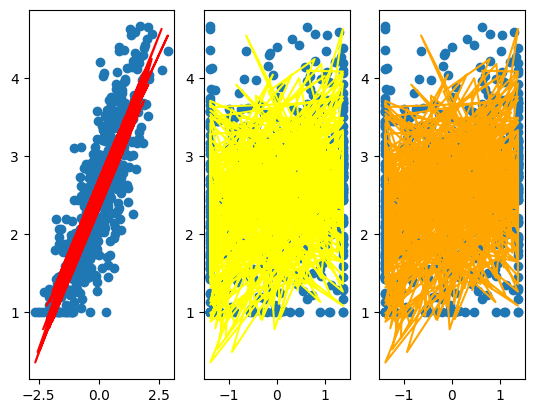

In [262]:
lamda = 0.01
theta = PolynomialFeatures(1).fit_transform(grades_X_fixed_colinear)
ridge = Ridge(lamda, fit_intercept=False)
ridge.fit(theta, grades_y)

h = ridge.predict(theta)

print(ridge_coef_6_b)
print(ridge_coef_6_b_2)
print(ridge.coef_)

x_0_scaled = []
x_1_scaled = []
x_2_scaled = []
for exam, grade, grade_2 in grades_X_fixed_colinear:
    x_0_scaled.append(exam)
    x_1_scaled.append(grade)
    x_2_scaled.append(grade_2)

plt.subplot(1,3,1)
plt.scatter(x_0_scaled, grades_y)
plt.plot(x_0_scaled, h, color="red")
plt.subplot(1,3,2)
plt.scatter(x_1_scaled, grades_y)
plt.plot(x_1_scaled, h, color="yellow")
plt.subplot(1,3,3)
plt.scatter(x_2_scaled, grades_y)
plt.plot(x_2_scaled, h, color="orange")

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [259]:
weights_1 = []
weights_2 = []

for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(grades_X_fixed_colinear, grades_y_fixed, train_size=0.5, random_state=i)
    theta = PolynomialFeatures(1).fit_transform(train_x)

    w1 = Ridge(0.01, fit_intercept=False).fit(theta, train_y)
    w2 = Ridge(1000, fit_intercept=False).fit(theta, train_y)

    weights_1.append(w1.coef_)
    weights_2.append(w2.coef_)

    print(w1.coef_)
    print(w2.coef_)

print(weights_1)
print(weights_2)

#...

[[0.03118815 0.8202303  0.04935641 0.04935641]]
[[0.00410753 0.1637711  0.02069474 0.02069474]]
[[0.01518918 0.82199323 0.08310772 0.08310772]]
[[0.0105872  0.16258723 0.03682587 0.03682587]]
[[0.00127615 0.83774111 0.06622437 0.06622437]]
[[1.35285431e-04 1.69352937e-01 2.57416457e-02 2.57416457e-02]]
[[0.0068492  0.81101724 0.06279006 0.06279006]]
[[0.01295685 0.1641502  0.03375393 0.03375393]]
[[0.0055025  0.80490258 0.09372304 0.09372304]]
[[-0.00091629  0.15110679  0.03753015  0.03753015]]
[[-0.00980853  0.82136129  0.07939315  0.07939315]]
[[0.01370404 0.15458101 0.03547864 0.03547864]]
[[0.06990346 0.82421662 0.07754303 0.07754303]]
[[0.01059229 0.16765063 0.03675152 0.03675152]]
[[-0.02877307  0.81334087  0.08100444  0.08100444]]
[[-0.01062744  0.16656992  0.0370517   0.0370517 ]]
[[0.01095829 0.81385508 0.07171183 0.07171183]]
[[0.00723651 0.17413571 0.03717305 0.03717305]]
[[-0.01224384  0.7905515   0.08662686  0.08662686]]
[[-0.00688415  0.16120548  0.0370747   0.0370747 ]]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.